<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">



### Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import statsmodels
import fastcluster
from pandas_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

Invoice ID Branch       City Customer type  Gender        Product line  \
0  149-71-6266      B   Mandalay        Member    Male   Sports and travel   
1  640-49-2076      B   Mandalay        Normal    Male   Sports and travel   
2  595-11-5460      A     Yangon           NaN    Male   Health and beauty   
3  183-56-6882      C  Naypyitaw           NaN  Female  Food and beverages   
4  232-16-2483      C  Naypyitaw           NaN  Female   Sports and travel   

   Unit price  Quantity      Tax     Total     Date   Time      Payment  \
0       78.07       9.0  35.1315  737.7615  1/28/19  12:43         Cash   
1       83.78       8.0  33.5120  703.7520  1/10/19  14:49         Cash   
2       96.58       2.0   9.6580  202.8180  3/15/19  10:12  Credit card   
3       99.42       4.0  19.8840  417.5640   2/6/19  10:42      Ewallet   
4       68.12       1.0   3.4060   71.5260   1/7/19  12:28      Ewallet   

     COGS  Gross Margin Percentage  Gross Income  Rating  
0  702.63                 4.761905       35.1315     4.5  
1  670.24                 4.761905       33.5120     5.1  
2  193.16                 4.761905        9.6580     5.1  
3  397.68                 4.761905       19.8840     7.5  
4   68.12                 4.761905        3.4060     6.8

In [4]:
df.tail(10)

Invoice ID Branch       City Customer type  Gender  \
962  690-01-6631      B   Mandalay        Normal    Male   
963  652-49-6720      C  Naypyitaw        Member  Female   
964  233-67-5758      C  Naypyitaw        Normal    Male   
965  303-96-2227      B   Mandalay        Normal  Female   
966  727-02-1313      A     Yangon        Member    Male   
967  347-56-2442      A     Yangon        Normal    Male   
968  849-09-3807      A     Yangon        Member  Female   
969  849-09-3807      A     Yangon        Member  Female   
970  745-74-0715      A     Yangon        Normal    Male   
971  452-04-8808      B   Mandalay        Normal    Male   

               Product line  Unit price  Quantity   Tax 5%      Total  \
962     Fashion accessories         NaN      10.0   8.7450   183.6450   
963  Electronic accessories         NaN       1.0   3.0475    63.9975   
964       Health and beauty         NaN       1.0   2.0175    42.3675   
965      Home and lifestyle         NaN      10.0  48.6900  1022.4900   
966      Food and beverages         NaN       1.0   1.5920    33.4320   
967      Home and lifestyle       65.82       1.0   3.2910    69.1110   
968     Fashion accessories       88.34       7.0  30.9190   649.2990   
969     Fashion accessories       88.34       7.0  30.9190   649.2990   
970  Electronic accessories         NaN       2.0   5.8030   121.8630   
971  Electronic accessories       87.08       NaN  30.4780   640.0380   

        Date   Time  Payment    COGS  Gross Margin Percentage  Gross Income  \
962  2/22/19  18:35  Ewallet  174.90                 4.761905        8.7450   
963  2/18/19  11:40  Ewallet   60.95                 4.761905        3.0475   
964  1/29/19  13:46  Ewallet   40.35                 4.761905        2.0175   
965   3/2/19  17:16  Ewallet  973.80                 4.761905       48.6900   
966   2/9/19  13:22     Cash   31.84                 4.761905        1.5920   
967  2/22/19  15:33     Cash   65.82                 4.761905        3.2910   
968  2/18/19  13:28     Cash  618.38                 4.761905       30.9190   
969  2/18/19  13:28     Cash  618.38                 4.761905       30.9190   
970  3/10/19  20:46  Ewallet  116.06                 4.761905        5.8030   
971  1/26/19  15:17     Cash  609.56                 4.761905       30.4780   

     Rating  
962     6.6  
963     5.9  
964     6.2  
965     4.4  
966     7.7  
967     4.1  
968     6.6  
969     6.6  
970     8.8  
971     5.5

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'COGS', 'Gross Margin Percentage', 'Gross Income',
       'Rating'],
      dtype='object')

In [8]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
COGS                       float64
Gross Margin Percentage    float64
Gross Income               float64
Rating                     float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
COGS                              float64
Gross Margin Percentage           float64
Gross Income                      float64
Rating                            float64
dtype: object

In [12]:
df.set_index('Date', inplace=True)

In [13]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-28  149-71-6266      B   Mandalay        Member    Male   
2019-01-10  640-49-2076      B   Mandalay        Normal    Male   
2019-03-15  595-11-5460      A     Yangon           NaN    Male   
2019-02-06  183-56-6882      C  Naypyitaw           NaN  Female   
2019-01-07  232-16-2483      C  Naypyitaw           NaN  Female   

                  Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                      
2019-01-28   Sports and travel       78.07       9.0  35.1315  737.7615   
2019-01-10   Sports and travel       83.78       8.0  33.5120  703.7520   
2019-03-15   Health and beauty       96.58       2.0   9.6580  202.8180   
2019-02-06  Food and beverages       99.42       4.0  19.8840  417.5640   
2019-01-07   Sports and travel       68.12       1.0   3.4060   71.5260   

             Time      Payment    COGS  Gross Margin Percentage  Gross Income  \
Date                                                                            
2019-01-28  12:43         Cash  702.63                 4.761905       35.1315   
2019-01-10  14:49         Cash  670.24                 4.761905       33.5120   
2019-03-15  10:12  Credit card  193.16                 4.761905        9.6580   
2019-02-06  10:42      Ewallet  397.68                 4.761905       19.8840   
2019-01-07  12:28      Ewallet   68.12                 4.761905        3.4060   

            Rating  
Date                
2019-01-28     4.5  
2019-01-10     5.1  
2019-03-15     5.1  
2019-02-06     7.5  
2019-01-07     6.8

In [14]:
df.describe()


Unit price    Quantity      Tax 5%        Total        COGS  \
count  965.000000  952.000000  972.000000   972.000000  972.000000   
mean    55.646093    5.505252   15.366447   322.695377  307.328930   
std     26.564106    2.936763   11.759974   246.959461  235.199487   
min     10.080000    1.000000    0.508500    10.678500   10.170000   
25%     32.620000    3.000000    5.833875   122.511375  116.677500   
50%     55.390000    5.000000   12.066000   253.386000  241.320000   
75%     77.950000    8.000000   22.445250   471.350250  448.905000   
max     99.960000   10.000000   49.650000  1042.650000  993.000000   

       Gross Margin Percentage  Gross Income      Rating  
count               972.000000    972.000000  972.000000  
mean                  4.761905     15.366447    6.982099  
std                   0.000000     11.759974    1.715738  
min                   4.761905      0.508500    4.000000  
25%                   4.761905      5.833875    5.500000  
50%                   4.761905     12.066000    7.000000  
75%                   4.761905     22.445250    8.500000  
max                   4.761905     49.650000   10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

/home/taylor/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


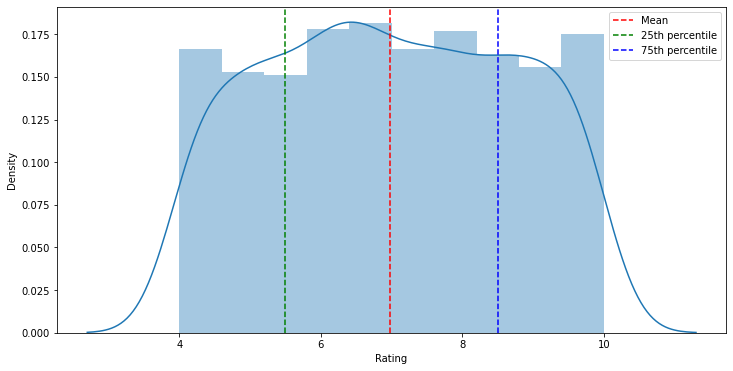

In [25]:
#make plot size for Rating fit screen
plt.figure(figsize=(12,6)) #12,6 is the size of the plot
sns.distplot(df['Rating']) #distplot is used to plot the distribution of the data
#draw line at mean of Rating with dashed red line and label it as Mean
plt.axvline(x=np.nanmean(df['Rating']), color='r', linestyle='--', label='Mean') 
#do the same for the 25th and 75th percentiles
plt.axvline(x=np.nanpercentile(df['Rating'], 25), color='g', linestyle='--', label='25th percentile')
plt.axvline(x=np.nanpercentile(df['Rating'], 75), color='b', linestyle='--', label='75th percentile')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'COGS'}>,
        <AxesSubplot:title={'center':'Gross Margin Percentage'}>],
       [<AxesSubplot:title={'center':'Gross Income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

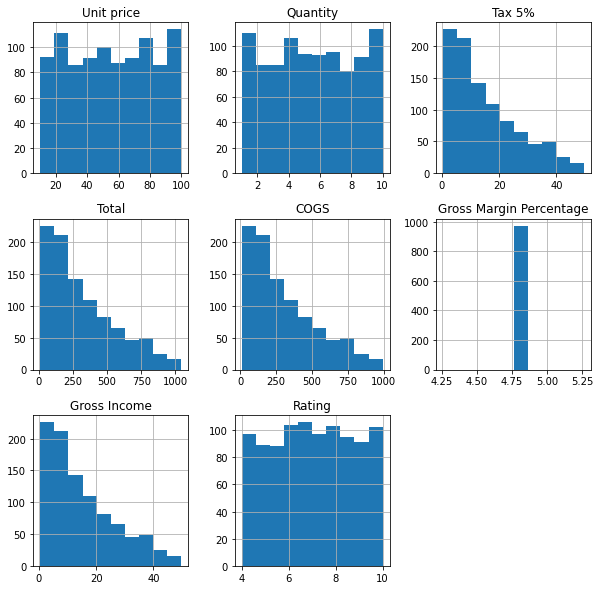

In [30]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

/home/taylor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

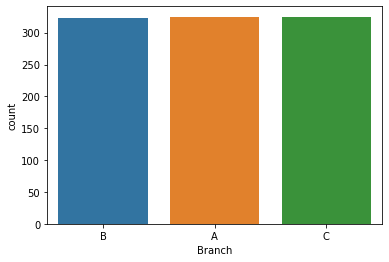

In [35]:
sns.countplot(df['Branch'])

In [36]:
df['Branch'].value_counts()

A    325
C    324
B    323
Name: Branch, dtype: int64

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

/home/taylor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Gross Income'>

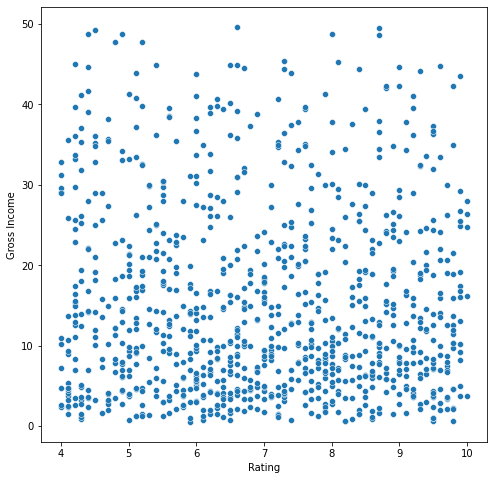

In [38]:
#make scatterplot of Rating and Gross Income with figsize of 8,8
plt.figure(figsize=(8,8))
sns.scatterplot(df['Rating'], df['Gross Income'])

<AxesSubplot:xlabel='Branch', ylabel='Gross Income'>

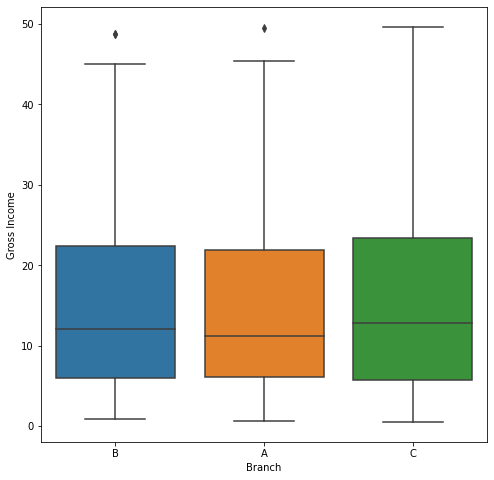

In [39]:
#create a boxplot of Branch, and Gross Income
plt.figure(figsize=(8,8))
sns.boxplot(x='Branch', y='Gross Income', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Gross Income'>

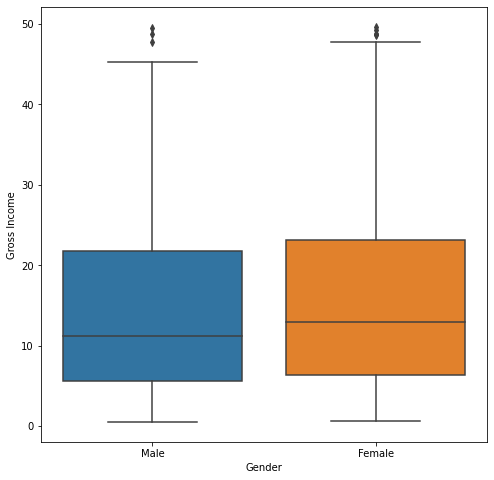

In [41]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Gender', y='Gross Income', data=df)

**Question 4:** Is there a noticeable time trend in gross income?

In [43]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='Gross Income'>

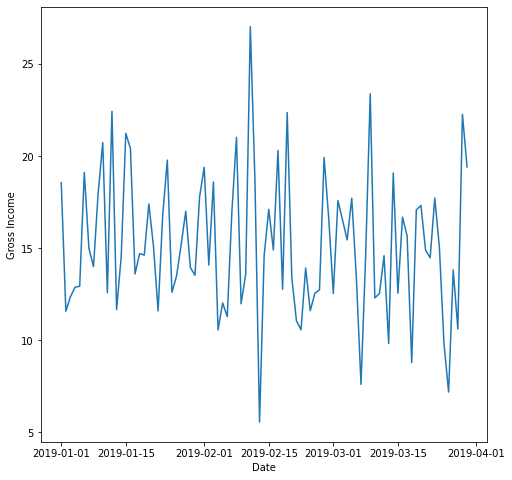

In [46]:
plt.figure(figsize=(8,8))
sns.lineplot(x=df.groupby(df.index).mean().index, 
            y=df.groupby(df.index).mean()['Gross Income'])

In [ ]:
#plot all bivariate relationships possible
#sns.pairplot(df) #not recommended on large data sets

### Task 4: Dealing With Duplicate Rows and Missing Values

In [5]:
df.duplicated().sum()

3

In [6]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
969  849-09-3807      A    Yangon        Member  Female   
970  745-74-0715      A    Yangon        Normal    Male   
971  452-04-8808      B  Mandalay        Normal    Male   

               Product line  Unit price  Quantity     Tax    Total     Date  \
969     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
970  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
971  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

      Time  Payment    COGS  Gross Margin Percentage  Gross Income  Rating  
969  13:28     Cash  618.38                 4.761905        30.919     6.6  
970  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
971  15:17     Cash  609.56                 4.761905        30.478     5.5

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.080495
Gender                     0.000000
Product line               0.040248
Unit price                 0.006192
Quantity                   0.019608
Tax                        0.000000
Total                      0.000000
Date                       0.000000
Time                       0.000000
Payment                    0.000000
COGS                       0.000000
Gross Margin Percentage    0.000000
Gross Income               0.000000
Rating                     0.000000
dtype: float64

<AxesSubplot:>

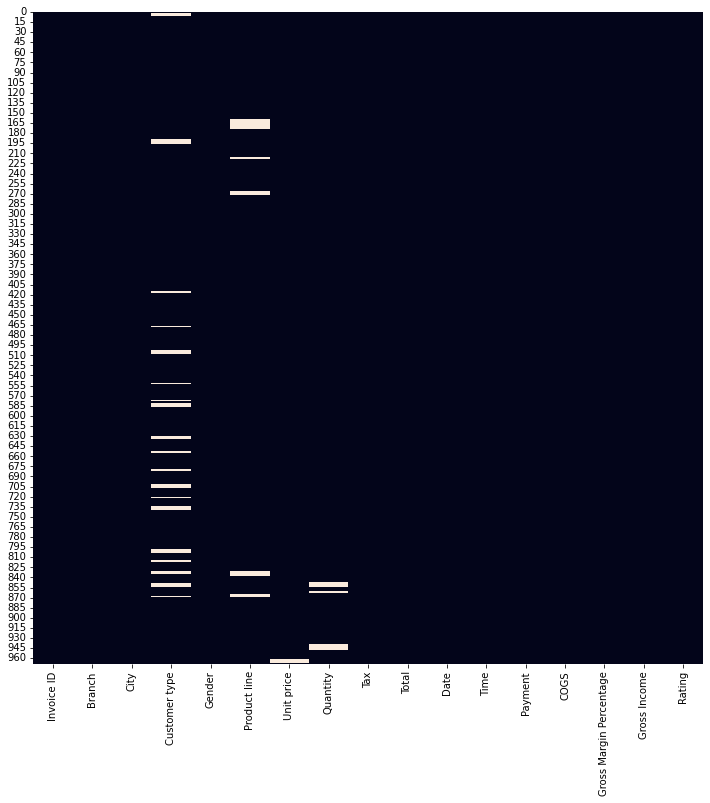

In [9]:
#create a heatmap of all isna values
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(), cbar=False)

In [10]:
#fill in missing values with mean of column
df.fillna(df.mean(), inplace=True)

/tmp/ipykernel_262/1496510596.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


<AxesSubplot:>

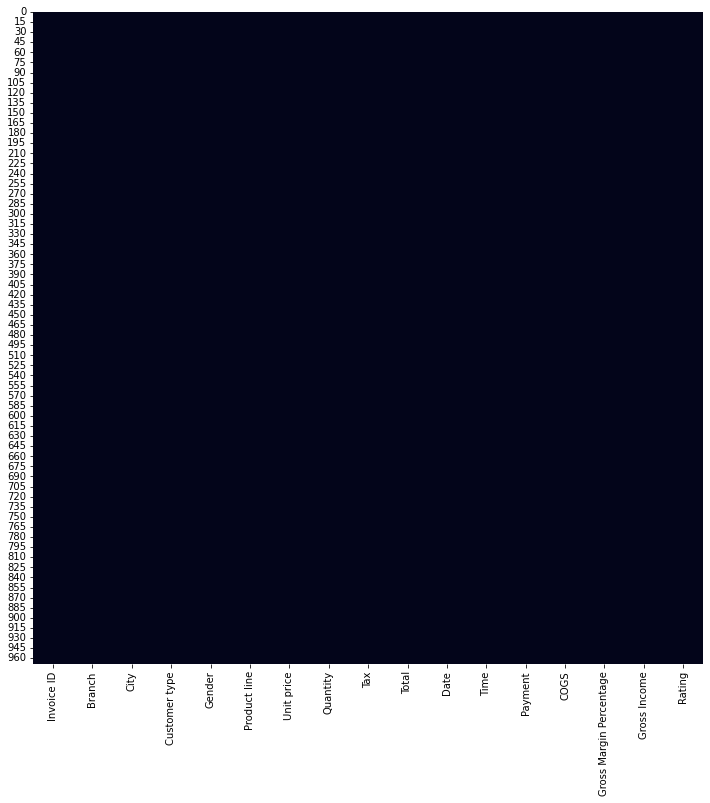

In [39]:
#create a heatmap of all isna values
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(), cbar=False)

In [12]:
df.mode().iloc[0] # get the mode for each column

Invoice ID                         101-17-6199
Branch                                       C
City                                 Naypyitaw
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.579502
Quantity                                  10.0
Tax                                      4.154
Total                                   87.234
Date                                   2/15/19
Time                                     14:42
Payment                                   Cash
COGS                                     83.08
Gross Margin Percentage               4.761905
Gross Income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [22]:
df.fillna(df.mode().iloc[0][1], inplace=True) # fill in missing values with mode

In [40]:
dataset = pd.read_csv('supermarket_sales.csv')

In [72]:
prof = ProfileReport(dataset) #create a profile report of the dataset using pandas_profiler
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [45]:
np.round(df.corr(),2) # get the correlation matrix

Unit price  Quantity   Tax  Total  COGS  \
Unit price                     1.00      0.01  0.63   0.63  0.63   
Quantity                       0.01      1.00  0.70   0.70  0.70   
Tax                            0.63      0.70  1.00   1.00  1.00   
Total                          0.63      0.70  1.00   1.00  1.00   
COGS                           0.63      0.70  1.00   1.00  1.00   
Gross Margin Percentage         NaN       NaN   NaN    NaN   NaN   
Gross Income                   0.63      0.70  1.00   1.00  1.00   
Rating                         0.00     -0.03 -0.03  -0.03 -0.03   

                         Gross Margin Percentage  Gross Income  Rating  
Unit price                                   NaN          0.63    0.00  
Quantity                                     NaN          0.70   -0.03  
Tax                                          NaN          1.00   -0.03  
Total                                        NaN          1.00   -0.03  
COGS                                         NaN          1.00   -0.03  
Gross Margin Percentage                      NaN           NaN     NaN  
Gross Income                                 NaN          1.00   -0.03  
Rating                                       NaN         -0.03    1.00

In [50]:
#remove Gross Margin Percentage column from dataframe
df.drop(['Gross Margin Percentage'], axis=1, inplace=True)




In [51]:
# get the updated correlation matrix
np.round(df.corr(),2)

Unit price  Quantity   Tax  Total  COGS  Gross Income  Rating
Unit price          1.00      0.01  0.63   0.63  0.63          0.63    0.00
Quantity            0.01      1.00  0.70   0.70  0.70          0.70   -0.03
Tax                 0.63      0.70  1.00   1.00  1.00          1.00   -0.03
Total               0.63      0.70  1.00   1.00  1.00          1.00   -0.03
COGS                0.63      0.70  1.00   1.00  1.00          1.00   -0.03
Gross Income        0.63      0.70  1.00   1.00  1.00          1.00   -0.03
Rating              0.00     -0.03 -0.03  -0.03 -0.03         -0.03    1.00

<AxesSubplot:>

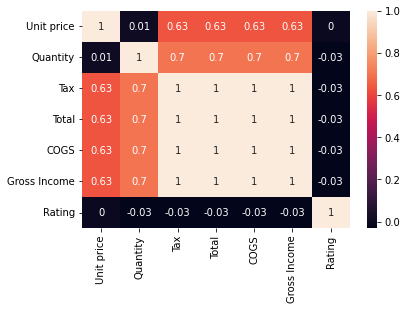

In [52]:
sns.heatmap(np.round(df.corr(),2),annot=True) # heatmap of correlation between all variables

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/